# 時系列解析入門

# **7. モデリングの応用と実装の際の注意点 (60分)**
この章では、時系列解析におけるモデルの選択と実装のポイント を学びます。内生変数のみに着目した予測と、外生変数を加えた予測の違いを理解し、それぞれの適用方法を解説します。さらに、モデルの解釈性や使い分けの基準を学び、実データを用いた解析事例を通じて実践的な活用方法を習得します。

# <font color="DarkOrange">1. モデルの選択と実装の際の注意点</font>
時系列解析にはさまざまなモデルが用いられます。データの特性や目的に応じて適切なモデルを選ぶことで、より正確で意味のある予測が可能になります。

## <font color="SeaGreen">時系列解析の2つのアプローチ</font>
時系列解析には大きく分けて2つのアプローチがあります。

### **1. 内生変数の動きに着目した予測をする方法**
過去のデータのパターンを学習し、将来の値を予測する方法です。

#### <u>内生変数とは？</u>
内生変数（Endogenous Variable）とは、時系列データの中で対象となる変数（目的変数）自体が過去の値や関連する他の変数の影響を受けて変動する変数のことを指します。つまり、システム内で決まる変数であり、外部からの影響ではなく、データの内部構造によって変動する変数です。

#### <u>特徴</u>
- データの内部で変動する：過去の値に依存しながら変化する（例: 過去の気温、過去の売上）<br>
- 時系列データの自己相関が強い：過去のデータが現在や未来のデータに影響を与える<br>
- モデルによる予測が可能：ARIMA, Prophet, LSTM などの時系列予測モデルが利用される<br>

#### <u>具体例</u>
- 気象データ予測<br>
内生変数（目的変数）：気温<br>
    - 過去の気温データを用いて未来の気温を予測する
    - 気温は過去の気温に依存するため、時系列データの自己相関が強い
    - 他の気象要因も影響するが基本的に気温そのものが変動要因
<br>
<br>
- 売上予測<br>
内生変数（目的変数）：売上
    - 過去の売上データを用いて未来の売上を予測する
    - 季節性がある場合、過去の売上が未来の売上を決定する要因になる
    - プロモーションや価格変動などの外生変数も影響するが、基本的に売上は過去の売上に依存
<br>
<br>

<font color="red">内生変数は、データの内部構造によって変動する変数 であり、時系列予測において中心的な役割を果たします。過去のデータに基づいて未来の値を予測するモデル（ARIMA, Prophet, LSTM など）では、内生変数の自己相関を正しく理解し、活用することが重要 です。**外部の影響を考慮する場合は、外生変数を加えることで予測精度を向上させることができます。**</font>
<br>
<br>

### **2. 外生変数（外部要因）を取り込み予測する方法**
外部要因をたくさん取り込んで予測する方法です。

#### <u>外生変数とは？</u>
外生変数（Exogenous Variable）とは、時系列データに影響を与える外部の要因です。過去のデータそのものではなく、外部環境の変化によって変動する要素を指します。モデルの中では説明変数として扱われ、これを追加することで予測の精度を高めることができます。このような要因をモデルに加えることで、単純な時系列の変化だけでは捉えきれない影響を考慮し、より正確な予測が可能になります。

#### <u>特徴</u>
- データの外部から影響を与える：目的変数の変動に外部要因として関与
- 自己相関を持たない：目的変数とは独立した要因
- モデルに組み込むことで予測精度向上：単なる時系列モデルより精度が高まる
- 適切な外生変数の選択が重要：関係のない変数を加えると逆効果なため適切に選択すること
    
#### <u>具体例</u>
- 気象データ予測<br>
内生変数（目的変数）：気温<br>
外生変数（説明変数）：湿度、気圧、風速
    - 過去の気温データだけでなく、湿度・気圧などの外部要因を考慮することで、予測精度が向上する

- 売上予測<br>
内生変数（目的変数）：売上<br>
外生変数（説明変数）：広告費、イベント、気温
    - 「過去の売上」だけでなく、「広告」「イベント」などの外部要因を加えることで、より正確な売上予測が可能となる
<br>
<br>

<font color="red">外生変数は、時系列予測の精度を向上させる鍵となる要素です。単純な過去データのトレンドや季節性だけでなく、外部要因の影響を正しく考慮することで、より実用的な予測モデルを構築できます。</font>






## <font color="SeaGreen">モデルの解釈性</font>
時系列モデルを選択する際には、解釈性の重要性も考慮する必要があります。解釈性とは、モデルがどのような要因に基づいて予測を行っているのかを明確に説明できる能力を指します。

### **解釈性が高いモデル**
どの（変数）要因が予測にどのように影響を与えたのかが明確である。

#### <u>具体例</u>
- 線形回帰<br>
係数が明確で、各変数の影響度が直接数値で示される

- 古典的時系列モデル<br>
時系列データの構造（トレンド・季節性）を、固定の数値パラメータとして明示的に表現できる


### **解釈性が低いモデル**
予測精度は高いが、どの要因が予測にどれだけ影響を与えたのかを把握しにくい。

#### <u>具体例</u>
- 深層学習<br>
多層の計算を通じてパターンを学習するため、予測の根拠が不明確

- LightGBM, XGBoost<br>
非線形な関係を学習し、高精度な予測が可能である一方、特徴量の重要度（Feature Importance）は示せるが、個々の判断の詳細は不明
<br>

例えば、商品価格の設定と需要の関係を分析する際、単純な線形回帰モデルを用いると、価格がどの程度売上に影響を与えるかを簡単に理解できます。一方、LGBMや深層学習を使うと精度は高くなる可能性がありますが、どの要素が影響したのかを説明するのが難しくなります。

※しかし、**SHAP（Shapley Additive Explanations）**などの手法を使うことで、モデルの解釈性を向上させることが可能です。SHAPとは、各特徴量がモデルの予測にどの程度貢献したのかを数値化・可視化する手法です。

## <font color="SeaGreen">モデルの使い分け</font>
実務ではデータの性質や目的に応じて適切なモデルを選択することが重要です。<br>
以下はモデルの選択時の目安となります。<br>
実務では<font color="red">データの性質や目的に応じて適切なモデルを選ぶことが重要</font>です。


- **内生変数の影響を強く捉えるモデル**<br>
    - ARIMA
    - SARIMA
    - VAR
    - Prophet
    - LDS

- **外生変数の影響を強く捉えるモデル**<br>
    - 線形回帰・重回帰
    - LGBM・XGBoost・ランダムフォレスト

- **過去データのトレンド、内生変数を活用したい場合**<br>
ARIMA・SARIMA・Prophet・LDS
- **外部要因の影響が強い場合**<br>
線形回帰・重回帰・LGBM
- **解釈性が必要な場合**<br>
線形回帰・重回帰
- **精度を重視する場合**<br>
LGBM・XGBoost・深層学習

# <font color="DarkOrange">2. 実データによる事例</font>
## <font color="SeaGreen">2-a テーブルデータ系のモデル事例：交通量予測</font>
テーブルデータ系のモデルLGBM（LightGBM）による予測例です。<br>
ここでは外生変数を用いて予測したい場合の事例です。

**利用データセット**<br>
Kaggleで公開されている Metro Interstate Traffic Volume データセット。<br>
https://www.kaggle.com/datasets/fekihmea/metro-interstate-traffic-volume

ミネソタ州ミネアポリス - セントポール間の I-94 西行きの1時間ごとの交通量。2012年から2018年までの天気と休日の特徴が含まれています。

<カラム情報>
- holiday：米国の祝日と地域の祝日
- temp：平均温度（ケルビン）
- rain_1h：1時間に降った雨量（mm）
- snow_1h：1時間に降った雪量（mm）
- clouds_all：雲量の割合
- weather_main：現在の天気の短いテキスト説明
- weather_description：現在の天気についてのより長いテキストの説明
- date_time：時間
- traffic_volume：I-94 ATR 301の西行きの交通量（1時間当たり）


**LightGBM**<br>
LightGBMは勾配ブースティング決定木アルゴリズムの一つであり、高速かつ効率的な学習が可能です。大規模なデータセットにも適用でき、精度の高い予測が可能です。


まずはデータを読み込んで中身を確認してみましょう。

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# データの読み込み
df = pd.read_csv("/content/drive/MyDrive/time_series/seminar/files/Metro_Interstate_Traffic_Volume.csv")

df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [ ]:
# データの基本情報を表示
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


（48204行, 9列）のデータが存在しており、'holiday'列にはNull値が存在しています。また、'holiday'列、 'weather_main'列、 'weather_description'列はカテゴリカル変数となっています。

In [ ]:
# カテゴリカルデータの確認
df['holiday'].unique()

array([nan, 'Columbus Day', 'Veterans Day', 'Thanksgiving Day',
       'Christmas Day', 'New Years Day', 'Washingtons Birthday',
       'Memorial Day', 'Independence Day', 'State Fair', 'Labor Day',
       'Martin Luther King Jr Day'], dtype=object)

In [ ]:
df['weather_main'].unique()

array(['Clouds', 'Clear', 'Rain', 'Drizzle', 'Mist', 'Haze', 'Fog',
       'Thunderstorm', 'Snow', 'Squall', 'Smoke'], dtype=object)

In [ ]:
df['weather_description'].unique()

array(['scattered clouds', 'broken clouds', 'overcast clouds',
       'sky is clear', 'few clouds', 'light rain',
       'light intensity drizzle', 'mist', 'haze', 'fog',
       'proximity shower rain', 'drizzle', 'moderate rain',
       'heavy intensity rain', 'proximity thunderstorm',
       'thunderstorm with light rain', 'proximity thunderstorm with rain',
       'heavy snow', 'heavy intensity drizzle', 'snow',
       'thunderstorm with heavy rain', 'freezing rain', 'shower snow',
       'light rain and snow', 'light intensity shower rain', 'SQUALLS',
       'thunderstorm with rain', 'proximity thunderstorm with drizzle',
       'thunderstorm', 'Sky is Clear', 'very heavy rain',
       'thunderstorm with light drizzle', 'light snow',
       'thunderstorm with drizzle', 'smoke', 'shower drizzle',
       'light shower snow', 'sleet'], dtype=object)

今回は、2016/01/01から2016/02/28のデータを抽出して利用します。

1192


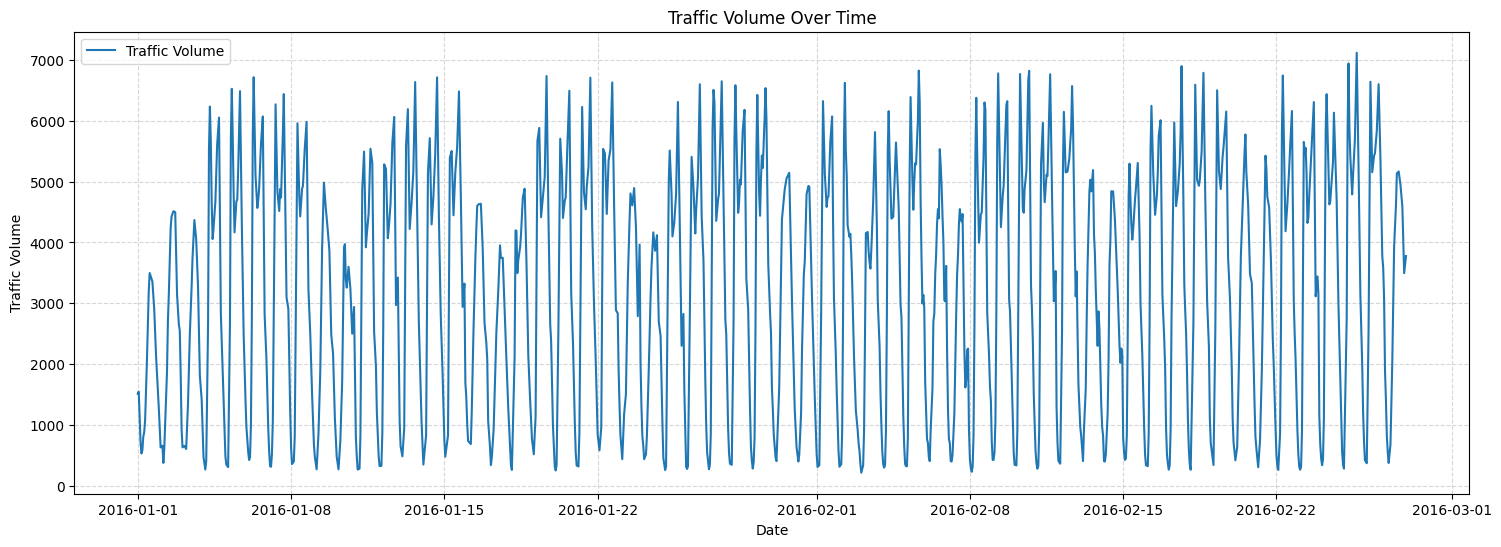

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

# 'date_time'列 を datetime 型に変換
df["date_time"] = pd.to_datetime(df["date_time"])

# 2016/01/01から2016/02/28のデータを抽出
df_filtered = df[(df["date_time"] >= "2016-01-01") & (df["date_time"] < "2016-02-28")].copy()
print(len(df_filtered))

# プロット
plt.figure(figsize=(18, 6))
plt.plot(df_filtered["date_time"], df_filtered["traffic_volume"], label="Traffic Volume")
plt.xlabel("Date")
plt.ylabel("Traffic Volume")
plt.title("Traffic Volume Over Time")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

データを解析できる形に処理します。

### 特徴量エンジニアリングを活用した精度向上

**特徴量エンジニアリング（Feature Engineering）とは？**<br>
特徴量エンジニアリング とは、機械学習モデルの性能を向上させるために、データを適切に変換・加工し、新しい特徴量（変数）を作成するプロセス を指します。
時系列モデル（例：LightGBM）でも、適切な特徴量エンジニアリングを施すことで、予測精度の向上 が可能です。

- **時間的なパターンを特徴量に追加**<br>
LightGBM などの機械学習モデルは datetime を直接扱えない ので、「時・曜日・月・年」といった<font color="red">数値情報に分解</font>することで、「時間帯によるパターン」や「季節性」 などを学習できるようになり、モデルの性能向上につながります。

- **過去の傾向を特徴量に追加**<br>
時系列データでは、「過去の値が未来の値に影響を与える」ことが多いです。<font color="red">ラグ特徴量</font>とは、過去のデータをそのまま特徴量として追加することで、時系列の傾向をモデルが学習できるようにする手法です。これにより、過去の傾向を学習し、時系列予測の精度を向上させることができます。

今回は上記2つを特徴量に追加します。

In [ ]:
# 追加の特徴量を作成
# 元のデータから、新しい情報を導き出し、モデルの性能向上を目指す
df_filtered.loc[:, "hour"] = df_filtered["date_time"].dt.hour # 時
df_filtered.loc[:, "day_of_week"] = df_filtered["date_time"].dt.dayofweek # 曜日
df_filtered.loc[:, "month"] = df_filtered["date_time"].dt.month # 月
df_filtered.loc[:, "year"] = df_filtered["date_time"].dt.year # 年

# ラグ特徴量を作成（1時間前、24時間前、7日前）
# 過去のデータを特徴量として追加する
df_filtered["traffic_lag_1"] = df_filtered["traffic_volume"].shift(1)   # 1時間前
df_filtered["traffic_lag_24"] = df_filtered["traffic_volume"].shift(24)  # 24時間前
df_filtered["traffic_lag_168"] = df_filtered["traffic_volume"].shift(168)  # 1週間前（24時間×7日）

# holiday 列の欠損値を '0' に置換
df_filtered['holiday'].fillna('0', inplace=True)

# NaN ができるので削除（最初のラグ分のデータがなくなる）
df_filtered = df_filtered.dropna()

# カテゴリカル変数のエンコーディング
label_enc_holiday = LabelEncoder()
label_enc_main = LabelEncoder()
label_enc_desc = LabelEncoder()
df_filtered.loc[:, "holiday_encoded"] = label_enc_holiday.fit_transform(df_filtered["holiday"].astype(str))
df_filtered.loc[:, "weather_main_encoded"] = label_enc_main.fit_transform(df_filtered["weather_main"].astype(str))
df_filtered.loc[:, "weather_description_encoded"] = label_enc_desc.fit_transform(df_filtered["weather_description"].astype(str))

追加の特徴量、エンコーディングされた列が追加されました。

In [ ]:
df_filtered.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,hour,day_of_week,month,year,traffic_lag_1,traffic_lag_24,traffic_lag_168,holiday_encoded,weather_main_encoded,weather_description_encoded
20512,0,272.56,0.0,0.0,90,Mist,mist,2016-01-08 17:00:00,5982,17,4,1,2016,5982.0,628.0,1513.0,0,5,10
20513,0,271.33,0.0,0.0,90,Snow,light snow,2016-01-08 19:00:00,3233,19,4,1,2016,5982.0,628.0,1513.0,0,7,9
20514,0,271.33,0.0,0.0,90,Mist,mist,2016-01-08 19:00:00,3233,19,4,1,2016,3233.0,359.0,1550.0,0,5,10
20515,0,270.15,0.0,0.0,90,Snow,light snow,2016-01-08 21:00:00,2506,21,4,1,2016,3233.0,359.0,719.0,0,7,9
20516,0,270.15,0.0,0.0,90,Mist,mist,2016-01-08 21:00:00,2506,21,4,1,2016,2506.0,359.0,533.0,0,5,10


目的変数と説明変数を設定します。

In [ ]:
# 目的変数
target = "traffic_volume"

# 説明変数
features = ["hour", "day_of_week", "month", "year", "traffic_lag_1", "traffic_lag_24", "traffic_lag_168", "holiday_encoded", "rain_1h", "snow_1h", "clouds_all", "weather_main_encoded", "weather_description_encoded"]

学習データ : テストデータ = 7 : 3 とします。

In [ ]:
from sklearn.model_selection import train_test_split

# データの分割（train:test = 7:3）
train_size = 0.7
train, test = train_test_split(df_filtered, train_size=train_size, shuffle=False) # shuffle=Falseで時系列の順序を維持

X_train, y_train = train[features], train[target]
X_test, y_test = test[features], test[target]

In [ ]:
!pip install --upgrade lightgbm

In [ ]:
params = {
    'objective': 'regression', # 回帰
    'metric': 'rmse', # モデルの性能評価指標
    'boosting': 'gbdt', # 勾配ブースティング決定木
    'verbose': -1, # ログ出力の詳細度
    'seed': 42
}

# データセットの作成
lgb_train = lgb.Dataset(X_train, y_train)
lgb_test = lgb.Dataset(X_test, y_test, reference=lgb_train)

# 学習
model = lgb.train(
    params,
    lgb_train,
    valid_sets=[lgb_train, lgb_test],
    valid_names=["train", "valid"],
    num_boost_round=1000,
    callbacks=[lgb.early_stopping(100), lgb.log_evaluation(100)]
)

# 予測
y_pred = model.predict(X_test, num_iteration=model.best_iteration)

Training until validation scores don't improve for 100 rounds
[100]	train's rmse: 158.246	valid's rmse: 408.23
[200]	train's rmse: 87.5541	valid's rmse: 402.437
[300]	train's rmse: 55.364	valid's rmse: 404.039
Early stopping, best iteration is:
[208]	train's rmse: 83.9571	valid's rmse: 401.47


In [ ]:
# 評価指標
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def mae(y_true, y_pred):
    return mean_absolute_error(y_true, y_pred)

def r2(y_true, y_pred):
    return r2_score(y_true, y_pred)

rmse_value = rmse(y_test, y_pred)
mae_value = mae(y_test, y_pred)
r2_value = r2(y_test, y_pred)

print(f'RMSE: {rmse_value:.2f}')
print(f'MAE: {mae_value:.2f}')
print(f'R² Score: {r2_value:.2f}')

RMSE: 401.47
MAE: 278.67
R² Score: 0.96


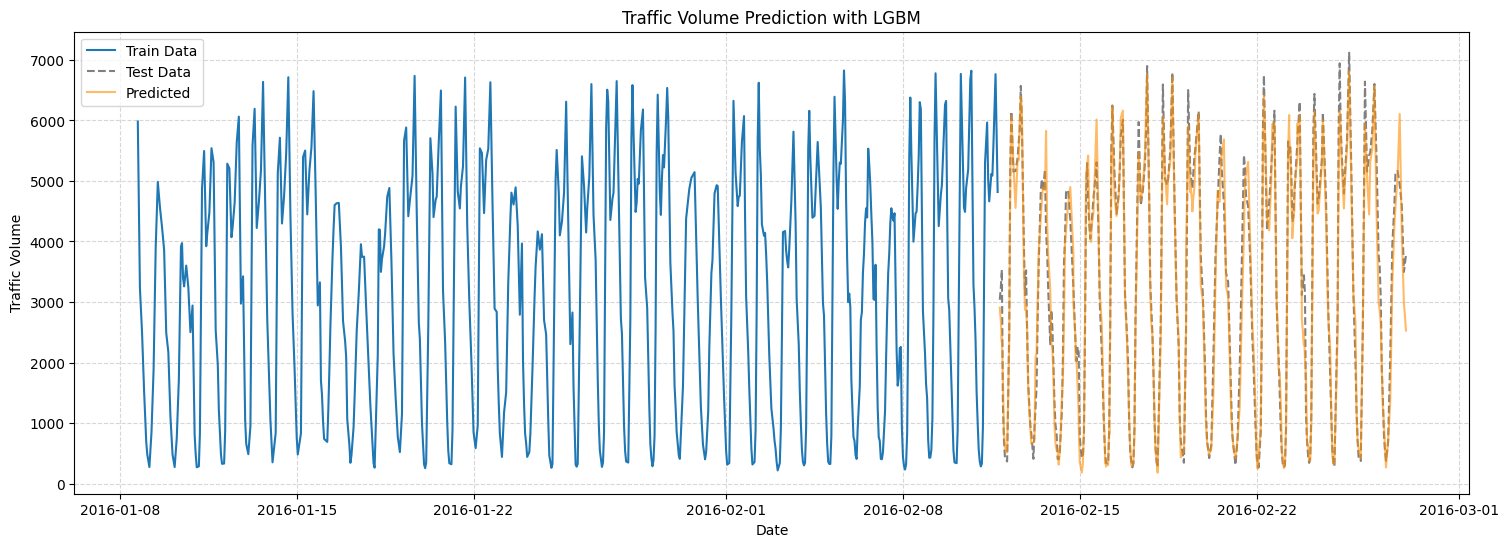

In [ ]:
# 予測結果のプロット
plt.figure(figsize=(18, 6))
plt.plot(train["date_time"], y_train, label="Train Data", linestyle='solid')
plt.plot(test["date_time"], y_test, label="Test Data", linestyle='dashed', color='0.5', linewidth="1.5",)
plt.plot(test["date_time"], y_pred, label="Predicted", linestyle='solid', color='darkorange', alpha=0.6)
plt.xlabel("Date")
plt.ylabel("Traffic Volume")
plt.title("Traffic Volume Prediction with LGBM")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

綺麗に予測できていそうです。

## <font color="SeaGreen">2-b 内生変数の動きに着目した予測モデル事例：気象予測</font>
ここでは内生変数の動きに着目した予測をしたい場合の事例です。<br>
Prophetモデルによる予測例です。<br>
後半部分では、外生変数を取り込んでモデル作成する例を扱います。

**利用データセット**<br>
Kaggleで公開されている Weather Dataset in New Delhi は、インド・ニューデリーの気象データを収集したデータセットです。2013年1月1日から2017年4月24日までのデータを含んでおり、気温、湿度、風速、気圧といった気象パラメータが日次で記録されています。

<カラム情報>
- date：観測日付（YYYY-MM-DD形式）
- meantemp：平均気温（摂氏）
- humidity：湿度（%）
- wind_speed：風速（km/h）
- meanpressure：平均気圧（hPa）

気温(meantemp)の予測を行ってみましょう。

まずはデータを読み込んで中身を確認してみましょう。

In [ ]:
import pandas as pd

# データの読み込み
df = pd.read_csv("/content/drive/MyDrive/time_series/seminar/files/DailyDelhiClimate.csv")

df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013/1/1,10.000000,84.500000,0.000000,1015.666667
1,2013/1/2,7.400000,92.000000,2.980000,1017.800000
2,2013/1/3,7.166667,87.000000,4.633333,1018.666667
3,2013/1/4,8.666667,71.333333,1.233333,1017.166667
4,2013/1/5,6.000000,86.833333,3.700000,1016.500000


In [ ]:
# データの基本情報を表示
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1575 entries, 0 to 1574
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1575 non-null   object 
 1   meantemp      1575 non-null   float64
 2   humidity      1575 non-null   float64
 3   wind_speed    1575 non-null   float64
 4   meanpressure  1575 non-null   float64
dtypes: float64(4), object(1)
memory usage: 61.7+ KB


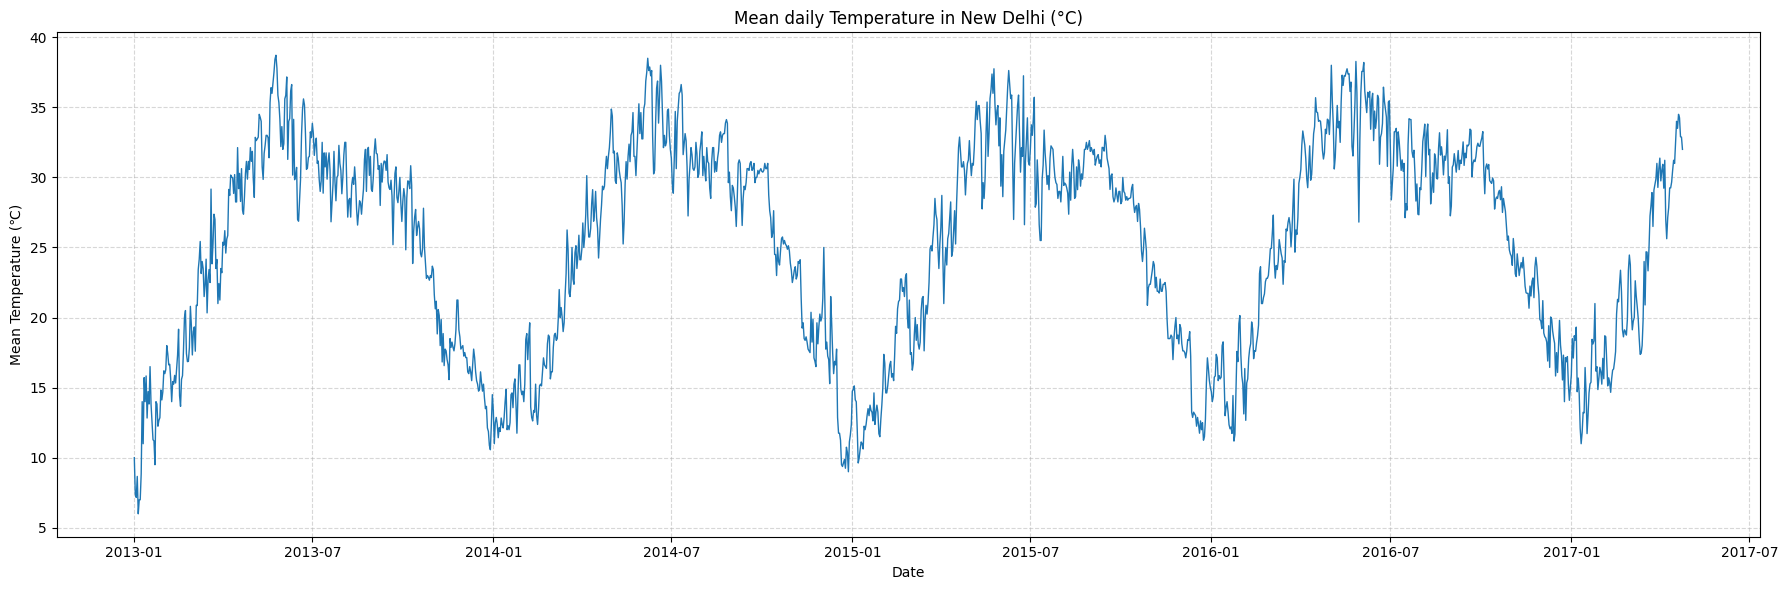

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# 必要なカラムの選択
df_filtered = df[['date', 'meantemp']]
df_filtered.columns = ['ds', 'y']

# 日付の型変換
df_filtered['ds'] = pd.to_datetime(df_filtered['ds'])

# プロット
plt.figure(figsize=(18, 6))
plt.plot(df_filtered['ds'], df_filtered['y'], linewidth=1)
plt.title('Mean daily Temperature in New Delhi (°C)')
plt.xlabel('Date')
plt.ylabel('Mean Temperature (℃)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

次に予測精度を評価するため、データを学習データセットとテストデータセットに分割してデータを視覚的に確認します。<br>
今回は、学習データ：テストデータ = 7：3 とします。

In [ ]:
from sklearn.model_selection import train_test_split
train_size = 0.7
train_df, test_df = train_test_split(df_filtered, train_size=train_size, shuffle=False)

まずはシンプルにProphetモデルの作成と学習を行い予測してみます。

In [ ]:
from prophet import Prophet

# Prophet モデルのインスタンス化
model = Prophet()

# モデルの学習
model.fit(train_df)

# テストデータの期間に対する予測を行う
future = test_df[['ds']]

# 予測の実行
forecast = model.predict(future)
forecast.head()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3o20x4in/e87i38z2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3o20x4in/efe27osh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89452', 'data', 'file=/tmp/tmp3o20x4in/e87i38z2.json', 'init=/tmp/tmp3o20x4in/efe27osh.json', 'output', 'file=/tmp/tmp3o20x4in/prophet_modeldxpytnv3/prophet_model-20250219131921.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:19:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:19:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-08,25.606089,10.187971,15.405916,25.606089,25.606089,-12.748919,-12.748919,-12.748919,-0.060758,-0.060758,-0.060758,-12.688161,-12.688161,-12.688161,0.0,0.0,0.0,12.857170
1,2016-01-09,25.608716,10.490618,15.586350,25.608716,25.608716,-12.714989,-12.714989,-12.714989,-0.123209,-0.123209,-0.123209,-12.591779,-12.591779,-12.591779,0.0,0.0,0.0,12.893727
2,2016-01-10,25.611343,10.597508,15.501820,25.611343,25.611343,-12.717222,-12.717222,-12.717222,-0.225293,-0.225293,-0.225293,-12.491929,-12.491929,-12.491929,0.0,0.0,0.0,12.894121
3,2016-01-11,25.613971,10.732033,16.027246,25.613971,25.613971,-12.317131,-12.317131,-12.317131,0.072917,0.072917,0.072917,-12.390048,-12.390048,-12.390048,0.0,0.0,0.0,13.296840
4,2016-01-12,25.616598,10.734869,15.949382,25.616598,25.616598,-12.196391,-12.196391,-12.196391,0.090939,0.090939,0.090939,-12.287330,-12.287330,-12.287330,0.0,0.0,0.0,13.420207


dataframeにds以外の新しいカラムが追加されていて、yhatが予測値となります。

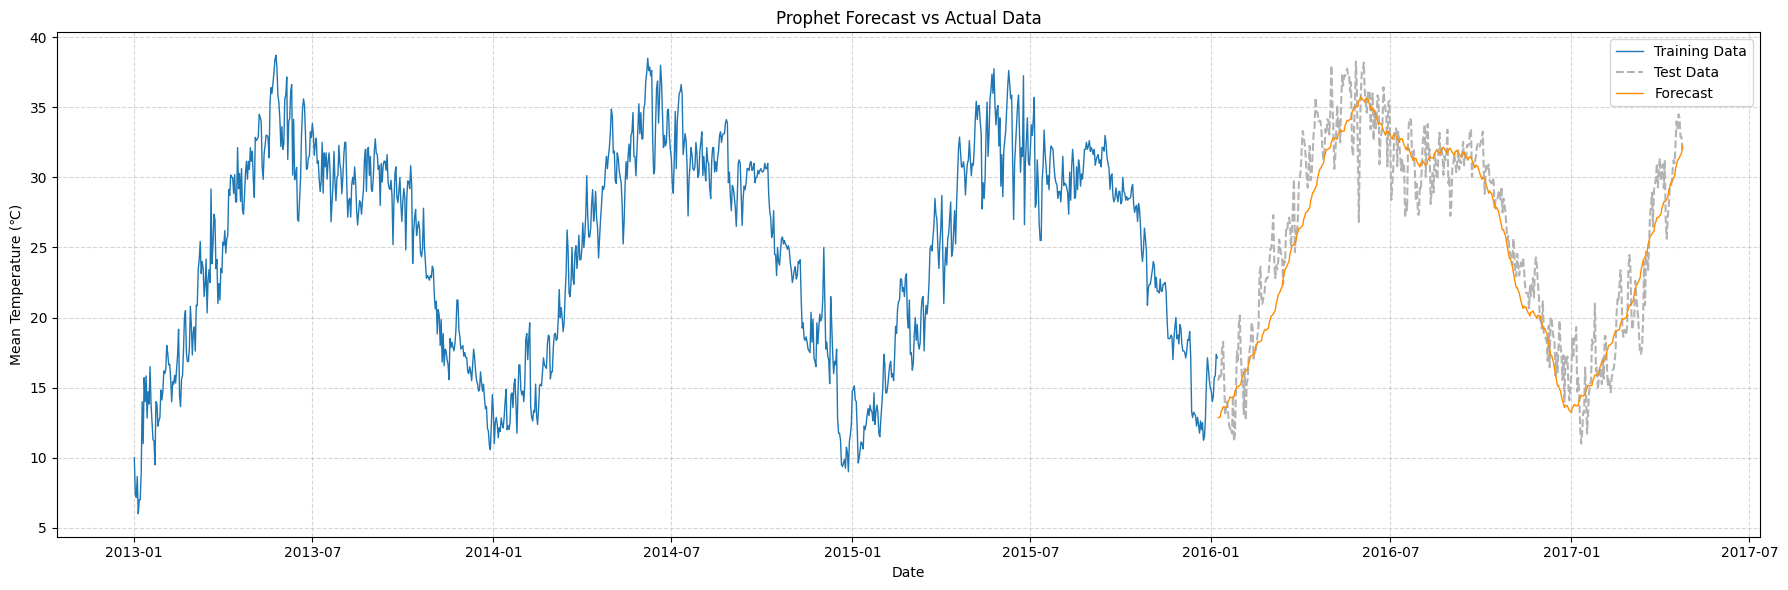

In [ ]:
# 予測結果と実データの可視化
plt.figure(figsize=(18, 6))
# 学習データ
plt.plot(train_df['ds'], train_df['y'], label='Training Data', linewidth=1)
# テストデータ
plt.plot(test_df['ds'], test_df['y'], label='Test Data', color='0.7', linestyle='dashed')
# 予測結果
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='DarkOrange', linewidth=1)

plt.title('Prophet Forecast vs Actual Data')
plt.xlabel('Date')
plt.ylabel('Mean Temperature (℃)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

予測精度を評価するために、RMSE、MSE、MAE、MAPEを計算します。

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

# 実測値と予測値を取得
y_true = test_df['y'].values
y_pred = forecast['yhat'].values

# 各評価指標を計算
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
mape = mean_absolute_percentage_error(y_true, y_pred)

# 結果を表示
print(f"MSE: {round(mse, 3)}")
print(f"RMSE: {round(rmse, 3)}")
print(f"MAE: {round(mae, 3)}")
print(f"MAPE: {round(mape, 3)}")

MSE: 6.007
RMSE: 2.451
MAE: 1.974
MAPE: 0.083


Prophet.plot_componemtsでcomponentごとに分解した可視化を行ってみます。

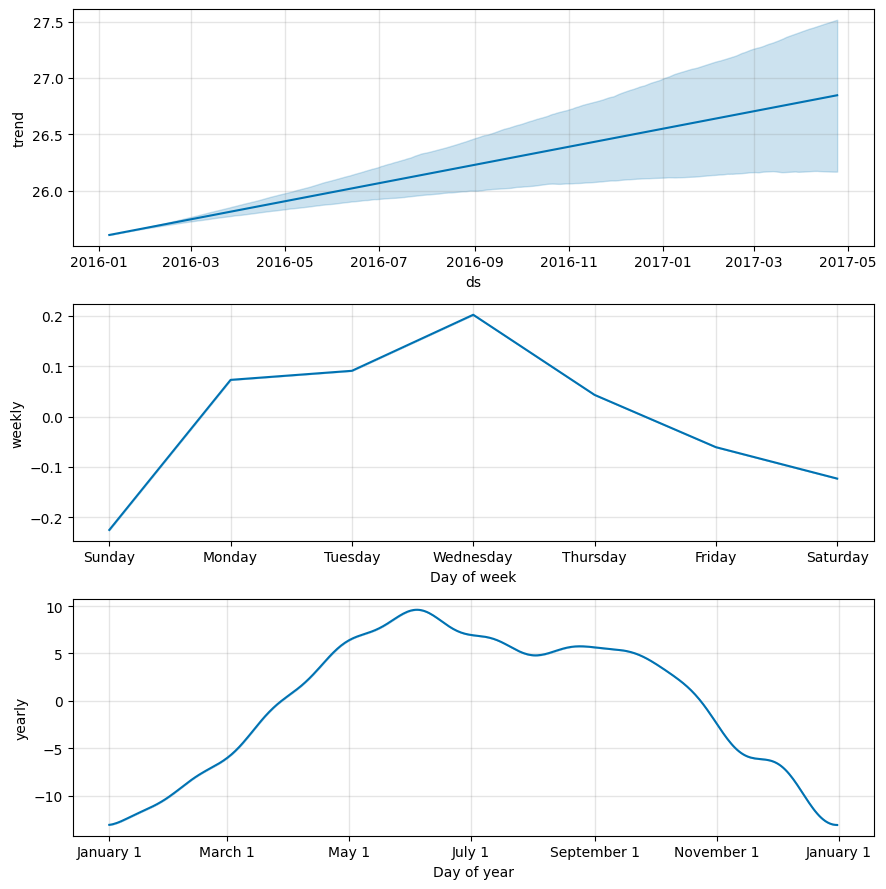

In [ ]:
# トレンドと季節性の分析

# コンポーネントの分解をプロット
fig2 = model.plot_components(forecast)
plt.show()

Prophetによる時系列解析の結果をトレンド・週間季節性・年間季節性の3つの要素に分解したものです。それぞれの要素について考察してみます。

- トレンド（Trend）
    - 観察ポイント<br>
        - 時間とともに気温が 緩やかに上昇 していることが分かります。<br>
        - 信頼区間（青い陰影部分）が広がっており、将来の予測の不確実性が増している。
    - 考察<br>
        - 気温が長期的に上昇している 可能性がある（都市のヒートアイランド現象や気候変動の影響かもしれない）。<br>
        - 将来の予測では、信頼区間が広がる ため、遠い未来の予測には慎重になる必要がある。

- 週間季節性（Weekly Seasonality）
    - 観察ポイント<br>
        - 月曜日から水曜日にかけて気温が上昇し、水曜日がピーク。<br>
        - その後、金曜日・土曜日に向かって徐々に低下する傾向が見られ、日曜日が最も気温が低い。
    - 考察<br>
        - これは都市活動（例：交通量や工場の操業など）が関係している可能性がある。

- 年間季節性（Yearly Seasonality）
    - 観察ポイント<br>
        - 5月～7月にかけて気温がピーク になり、11月以降に急激に低下 する。<br>
        - 1月頃が最も低温 であり、夏と冬の温度差が大きい。
    - 考察<br>
        - 夏（5月～7月） は最も暑く、冬（12月～1月） は最も寒い、というインド・ニューデリーの気候特性がよく表れている。

## 発展

### **特徴量エンジニアリングとOptunaを活用した精度向上**
Prophet のような時系列モデルでも、特徴量エンジニアリングを適切に行うことで、予測精度を向上させることができます。

Prophet などの時系列モデルは 「過去のデータのパターン」だけで未来を予測 しますが、
今回のデータのように湿度や気圧などの他の要因が影響を与えていそうな場合は、それを学習できるように<font color="red">外部特徴量</font>として追加することが重要です。

今回は、予測したい対象（今回の場合は気温）とは別に、予測に役立つ情報を追加するデータ（外部特徴量）として'humidity'列と'meanpressure'列を追加します。

In [ ]:
# 必要なカラムの選択
df_filtered = df[['date', 'meantemp', 'humidity', 'meanpressure']]
df_filtered.columns = ['ds', 'y', 'humidity', 'meanpressure']
df_filtered['ds'] = pd.to_datetime(df_filtered['ds'])

異常値がないか確認します。

In [ ]:
df_filtered.describe()

,ds,y,humidity,meanpressure
count,1575,1575.000000,1575.000000,1575.000000
mean,2015-02-27 00:00:00,25.231582,60.420115,1010.589745
min,2013-01-01 00:00:00,6.000000,13.428571,-3.041667
25%,2014-01-29 12:00:00,18.516667,49.750000,1001.875000
50%,2015-02-27 00:00:00,27.166667,62.380952,1009.000000
75%,2016-03-26 12:00:00,31.142857,72.125000,1015.183334
max,2017-04-24 00:00:00,38.714286,98.000000,7679.333333
std,NaN,7.337316,16.956083,175.298310


meanpressure（気圧）の最小値が-3.041667、最大値が7679.333333、と明らかに異常な値が含まれていそうです。このような異常値が含まれているとProphetの予測精度を低下させる原因となるので、現実的な範囲（950～1100 hPa）から大きく外れるデータが存在するか確認してみます。

In [ ]:
# 異常値の表示
abnormal_meanpressure_df = df_filtered[(df_filtered['meanpressure'] < 950) | (df_filtered['meanpressure'] > 1100)]
abnormal_meanpressure_df

,ds,y,humidity,meanpressure
1182,2016-03-28,25.933333,52.800000,7679.333333
1255,2016-06-09,35.733333,43.733333,938.066667
1300,2016-07-24,31.437500,72.250000,946.312500
1309,2016-08-02,30.687500,72.125000,310.437500
1321,2016-08-14,28.933333,83.700000,633.900000
1323,2016-08-16,31.333333,66.416667,-3.041667
1362,2016-09-24,31.240000,66.480000,1352.615385
1416,2016-11-17,21.730769,51.730769,1350.296296
1427,2016-11-28,22.454545,37.318182,12.045455
1461,2017-01-01,15.913043,85.869565,59.000000


In [ ]:
# 現実的な範囲（950～1100 hPa）のデータに絞り込み
df_filtered = df_filtered[(df_filtered['meanpressure'] >= 950) & (df_filtered['meanpressure'] <= 1100)]

In [ ]:
df_filtered.describe()

,ds,y,humidity,meanpressure
count,1565,1565.000000,1565.000000,1565.000000
mean,2015-02-23 11:52:10.734824192,25.216834,60.402081,1008.562226
min,2013-01-01 00:00:00,6.000000,13.428571,991.375000
25%,2014-01-27 00:00:00,18.500000,49.750000,1001.875000
50%,2015-02-22 00:00:00,27.166667,62.375000,1009.125000
75%,2016-03-19 00:00:00,31.142857,72.125000,1015.166667
max,2017-04-24 00:00:00,38.714286,98.000000,1023.000000
std,NaN,7.344507,16.963427,7.402853


異常値を持つデータ10件は削除されました。

次に、**特徴量エンジニアリング**を行います。<br>
時間的なパターンとして月、曜日を特徴量に追加します。<br>
またイベント日としてディワリ祭、モンスーン開始時期を設定します。

ディワリ祭（インドの光の祭典）は毎年10月末～11月頃 に開催されます。ディワリの時期は、北インドでは冬の始まりにあたるため、気温が下がり始める傾向にあります。また、大量の花火やランプが使われるため、大気汚染が悪化し、日照に影響を与える可能性があります。従って、ディワリ祭をイベント日として設定することで、ディワリ後の気温低下を考慮した予測ができる可能性があります。

モンスーン（雨季）の開始時期は 6月頃 です。モンスーンが始まると、大量の降雨によって気温が下がることが多く、湿度を急激に上昇させるため、モンスーンの開始日をイベント日として設定することで、急激な気温変化を予測に反映できる可能性があります。

In [ ]:
# 日付情報の分解
df_filtered['month'] = df_filtered['ds'].dt.month # 月
df_filtered['day_of_week'] = df_filtered['ds'].dt.dayofweek # 曜日（曜日の交通量の増減による気温への影響）

# イベント日の設定（ディワリ祭、モンスーン開始時期を設定）
events = pd.DataFrame({
    'ds': pd.to_datetime([
        '2016-10-30', '2017-10-19', '2018-11-07', # ディワリ祭
        '2016-06-15', '2017-06-10', '2018-06-05'  # モンスーン開始
    ]),
    'holiday': ['Diwali'] * 3 + ['Monsoon'] * 3
})

学習データとテストデータを再作成

In [ ]:
train_size = 0.7
train_df, test_df = train_test_split(df_filtered, train_size=train_size, shuffle=False)

さらに精度向上を狙ってOptunaの設定を行います。

In [ ]:
# optunaのインストール
!pip install optuna

In [ ]:
import optuna

def objective(trial):
    # ハイパーパラメータの範囲設定
    changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.001, 0.5)
    seasonality_prior_scale = trial.suggest_loguniform('seasonality_prior_scale', 0.01, 10)
    holidays_prior_scale = trial.suggest_loguniform('holidays_prior_scale', 0.01, 10)
    n_changepoints = trial.suggest_int('n_changepoints', 20, 35)
    changepoint_range = trial.suggest_discrete_uniform('changepoint_range', 0.8, 0.95, 0.001)

    # Prophetモデルの設定
    model = Prophet(
        changepoint_prior_scale=changepoint_prior_scale,
        seasonality_prior_scale=seasonality_prior_scale,
        holidays_prior_scale=holidays_prior_scale,
        n_changepoints=n_changepoints,
        changepoint_range=changepoint_range,
        holidays=events
    )

    # 特徴量の追加
    model.add_regressor('humidity')
    model.add_regressor('meanpressure')
    model.add_regressor('month')
    model.add_regressor('day_of_week')
    model.add_country_holidays(country_name='IN') # インド ('IN') の公式な祝日データを追加 する

    # モデルの学習
    model.fit(train_df)

    # テストデータに対する予測
    future = test_df[['ds', 'humidity', 'meanpressure', 'month', 'day_of_week']]
    forecast = model.predict(future)

    # 評価指標としてRMSEを最小化
    rmse = np.sqrt(mean_absolute_error(test_df['y'], forecast['yhat']))
    return rmse

# Optunaの実行
study = optuna.create_study(direction="minimize", sampler=optuna.samplers.TPESampler(seed=42))
study.optimize(objective, n_trials=100, show_progress_bar=True)

# 最適なハイパーパラメータの取得
best_params = study.best_params
print("Best Parameters:", best_params)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3o20x4in/1to_s2kp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3o20x4in/jtz4bvdw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17685', 'data', 'file=/tmp/tmp3o20x4in/1to_s2kp.json', 'init=/tmp/tmp3o20x4in/jtz4bvdw.json', 'output', 'file=/tmp/tmp3o20x4in/prophet_modelq3x1ussd/prophet_model-20250219132436.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:24:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:24:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


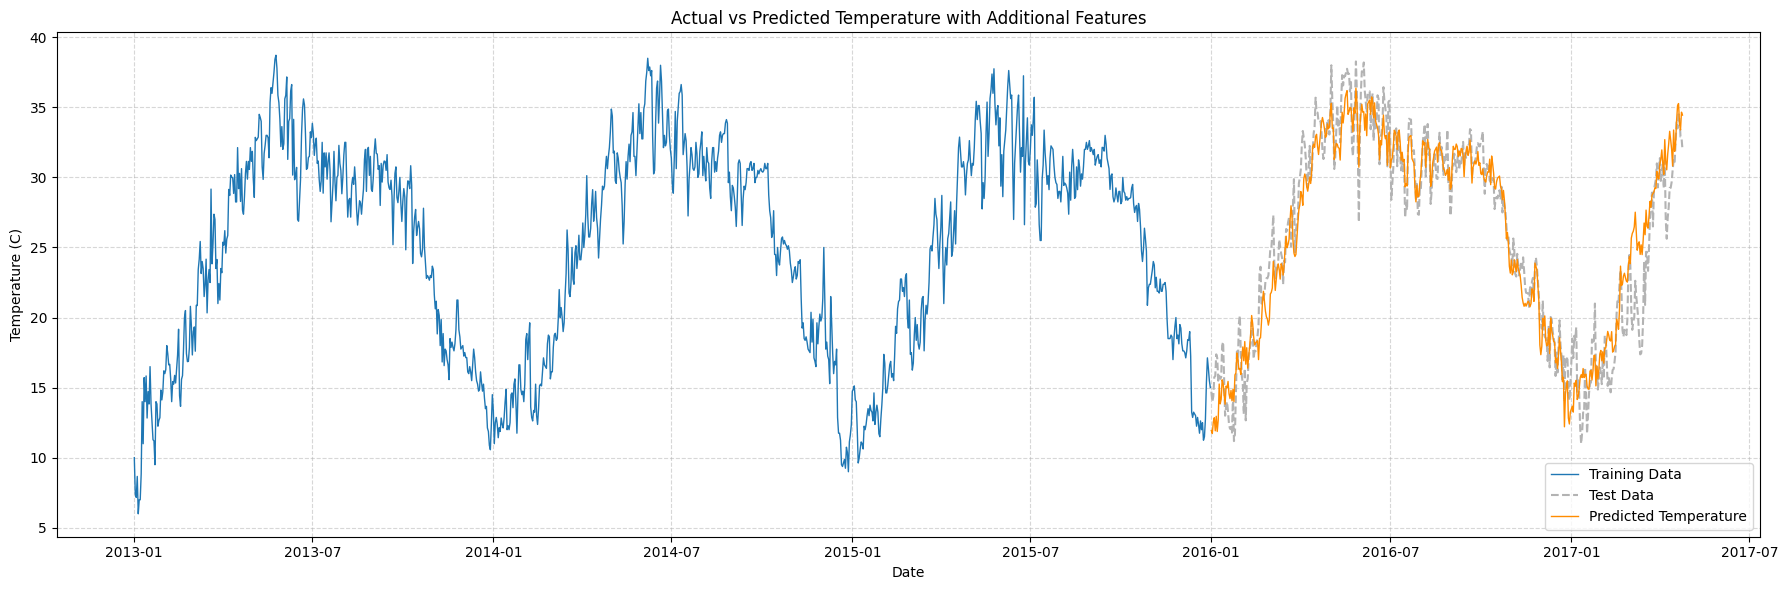

In [ ]:
# 探索された最適なハイパーパラメータを使ってモデルを再構築
best_model = Prophet(
    changepoint_prior_scale=best_params['changepoint_prior_scale'],
    seasonality_prior_scale=best_params['seasonality_prior_scale'],
    holidays_prior_scale=best_params['holidays_prior_scale'],
    n_changepoints=best_params['n_changepoints'],
    changepoint_range=best_params['changepoint_range'],
    holidays=events
)

best_model.add_regressor('humidity')
best_model.add_regressor('meanpressure')
best_model.add_regressor('month')
best_model.add_regressor('day_of_week')
best_model.add_country_holidays(country_name='IN')

# モデルの学習
best_model.fit(train_df)

# テストデータの期間に対する予測
future = test_df[['ds', 'humidity', 'meanpressure', 'month', 'day_of_week']]
forecast = best_model.predict(future)

# 予測結果と実データの可視化
plt.figure(figsize=(18, 6))
# 学習データ
plt.plot(train_df['ds'], train_df['y'], label='Training Data', linewidth=1)
# テストデータ
plt.plot(test_df['ds'], test_df['y'], label='Test Data', color='0.7', linestyle='dashed')
# 予測結果
plt.plot(forecast['ds'], forecast['yhat'], label='Predicted Temperature', color='DarkOrange', linewidth=1)
plt.xlabel("Date")
plt.ylabel("Temperature (C)")
plt.title("Actual vs Predicted Temperature with Additional Features")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

予測精度を評価するために、RMSE、MSE、MAE、MAPEを計算します。

In [ ]:
# 実測値と予測値を取得
y_true = test_df['y'].values
y_pred = forecast['yhat'].values

# 各評価指標を計算
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
mape = mean_absolute_percentage_error(y_true, y_pred)

# 結果を表示
print(f"MSE: {round(mse, 3)}")
print(f"RMSE: {round(rmse, 3)}")
print(f"MAE: {round(mae, 3)}")
print(f"MAPE: {round(mape, 3)}")

MSE: 4.423
RMSE: 2.103
MAE: 1.574
MAPE: 0.072


全ての指標が大きく改善されました。